In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
file_path = "usa_housing_kaggle.csv" 
df = pd.read_csv(file_path)

df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating
0,221958,1,1.9,4827,1979,2,1.45,82240,48.60,5
1,771155,2,2.0,1035,1987,2,1.75,74315,92.03,9
2,231932,1,3.0,2769,1982,1,1.46,79249,52.08,3
3,465838,3,3.3,2708,1907,3,1.62,80587,61.65,1
4,359178,4,3.4,1175,1994,2,0.74,20756,15.66,4


In [ ]:
Pre-Processing

In [13]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
 Price           0
Bedrooms        0
Bathrooms       0
SquareFeet      0
YearBuilt       0
GarageSpaces    0
LotSize         0
ZipCode         0
CrimeRate       0
SchoolRating    0
dtype: int64

Duplicate Rows: 0


In [15]:
label_encoder = LabelEncoder()
df['ZipCode_Label'] = label_encoder.fit_transform(df['ZipCode'])

df.head()

,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating,ZipCode_Label
0,221958,1,1.9,4827,1979,2,1.45,82240,48.60,5,250
1,771155,2,2.0,1035,1987,2,1.75,74315,92.03,9,226
2,231932,1,3.0,2769,1982,1,1.46,79249,52.08,3,237
3,465838,3,3.3,2708,1907,3,1.62,80587,61.65,1,243
4,359178,4,3.4,1175,1994,2,0.74,20756,15.66,4,38


In [17]:
# Initialize the scaler
scaler = StandardScaler()

# List of numeric features to scale
numeric_features = ['Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt', 'GarageSpaces', 'LotSize', 'CrimeRate', 'SchoolRating']

# Apply standard scaling
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display first few rows to check the scaling
df.head()


,Price,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating,ZipCode_Label
0,221958,-1.357488,-0.637500,1.487244,0.455784,0.436485,0.714196,82240,-0.025153,-0.036209,250
1,771155,-0.667240,-0.524468,-1.691355,0.678344,0.436485,1.266694,74315,1.483612,1.462084,226
2,231932,-1.357488,0.605851,-0.237850,0.539244,-0.460401,0.732612,79249,0.095743,-0.785355,237
3,465838,0.023008,0.944947,-0.288983,-1.547255,1.333371,1.027278,80587,0.428206,-1.534502,243
4,359178,0.713256,1.057979,-1.574002,0.873084,0.436485,-0.593383,20756,-1.169494,-0.410782,38


In [19]:
# Categorize price into Low, Medium, High using quantiles
df['PriceCategory'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

# Drop the original price column
df.drop(columns=['Price'], inplace=True)

# Display the dataset after transformation
df.head()

,Bedrooms,Bathrooms,SquareFeet,YearBuilt,GarageSpaces,LotSize,ZipCode,CrimeRate,SchoolRating,ZipCode_Label,PriceCategory
0,-1.357488,-0.637500,1.487244,0.455784,0.436485,0.714196,82240,-0.025153,-0.036209,250,Low
1,-0.667240,-0.524468,-1.691355,0.678344,0.436485,1.266694,74315,1.483612,1.462084,226,High
2,-1.357488,0.605851,-0.237850,0.539244,-0.460401,0.732612,79249,0.095743,-0.785355,237,Low
3,0.023008,0.944947,-0.288983,-1.547255,1.333371,1.027278,80587,0.428206,-1.534502,243,Medium
4,0.713256,1.057979,-1.574002,0.873084,0.436485,-0.593383,20756,-1.169494,-0.410782,38,Medium


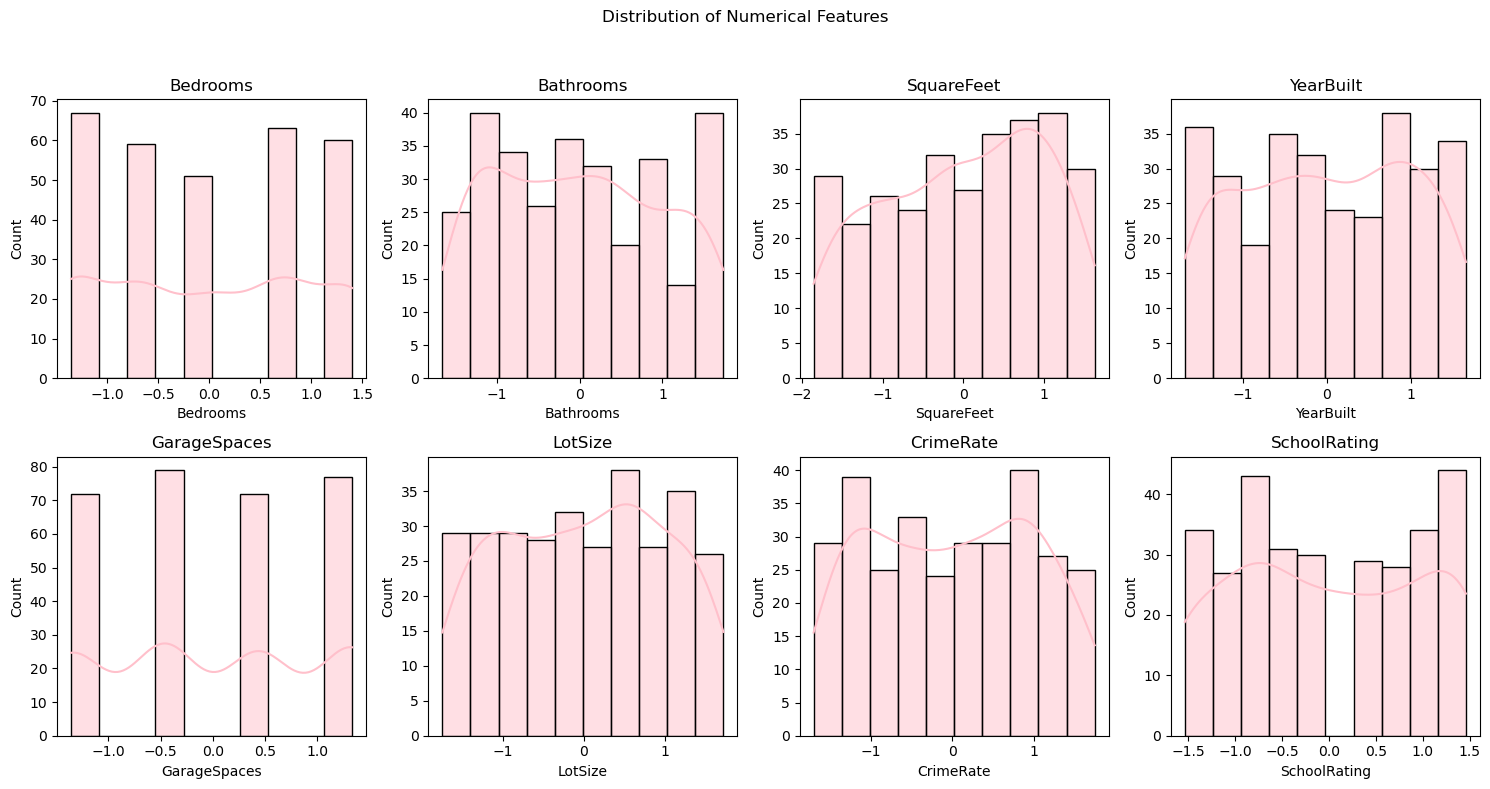

In [23]:
# Plot distributions of numerical features
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle("Distribution of Numerical Features")

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[i // 4, i % 4], color='pink')
    axes[i // 4, i % 4].set_title(feature)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [31]:
# Define Features and Target Variable
X = df.drop(columns=['PriceCategory'])  # Features
y = df['PriceCategory']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of resulting sets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (240, 10)
Testing Set Shape: (60, 10)


In [33]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.28

Classification Report:
               precision    recall  f1-score   support

        High       0.33      0.31      0.32        26
         Low       0.10      0.06      0.08        16
      Medium       0.31      0.44      0.36        18

    accuracy                           0.28        60
   macro avg       0.25      0.27      0.25        60
weighted avg       0.26      0.28      0.27        60



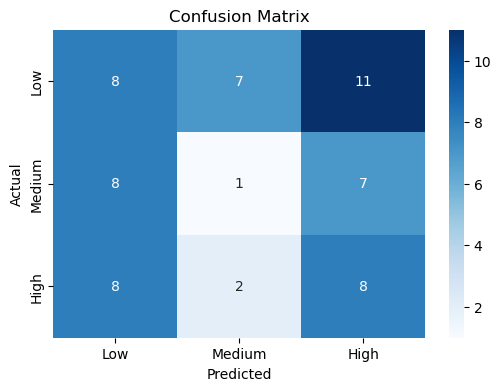

In [35]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Model Accuracy: 0.28

Classification Report:
               precision    recall  f1-score   support

        High       0.38      0.38      0.38        26
         Low       0.18      0.25      0.21        16
      Medium       0.25      0.17      0.20        18

    accuracy                           0.28        60
   macro avg       0.27      0.27      0.27        60
weighted avg       0.29      0.28      0.28        60



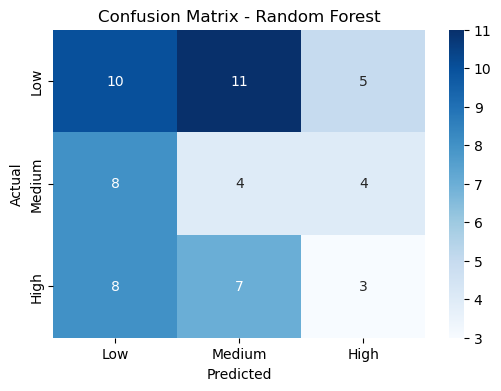

In [37]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}\n")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt="d",
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convert 'PriceCategory' to binary classification
df['PriceBinary'] = df['PriceCategory'].astype(str).replace({'Low': 0, 'Medium': 0, 'High': 1})

# Define features and target
X = df.drop(columns=['PriceCategory', 'PriceBinary'])
y = df['PriceBinary']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with higher iterations and class balancing
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.38

              precision    recall  f1-score   support

           0       0.44      0.35      0.39        34
           1       0.33      0.42      0.37        26

    accuracy                           0.38        60
   macro avg       0.39      0.39      0.38        60
weighted avg       0.40      0.38      0.38        60



C:\Users\Serina\AppData\Local\Temp\ipykernel_99076\4213502184.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PriceBinary'] = df['PriceCategory'].astype(str).replace({'Low': 0, 'Medium': 0, 'High': 1})
